## Solving Non Linear Problems

    What is the purpose of an activation Function?

Activation Functions allow NN to model non linear problems. All of NNs in the previous lessons have NOT had an activation function and will not do well with non linear datasets.

    What are some of the common activation functions?

Sigmoid  
Tanh  
ReLU (most popular)  

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Tensorflow version 1.12.0
Pandas version 0.20.3
Numpy version 1.15.4


## Function to model

    y = a * x^2 + b * x + c

In [3]:
# Let's generate 1000 random samples
pool = np.random.rand(1000,1).astype(np.float32)

# Shuffle the samples
np.random.shuffle(pool)

# sample size of 15%
sample = int(1000 * 0.15)

# 15% test
test_x = pool[0:sample]

# 85% training
train_x = pool[sample:]

print('Testing data points: ' + str(test_x.shape))
print('Training data points: ' + str(train_x.shape))

# Let's compute the ouput using 2 for a, 3 for b, and 5 for c
test_y = 2.0 * test_x**2 + 3.0 * test_x + 5
train_y = 2.0 * train_x**2 + 3.0 * train_x + 5

Testing data points: (150, 1)
Training data points: (850, 1)


In [4]:
df = pd.DataFrame({'x':train_x[:,0],
                   'y':train_y[:,0]})
df.head()

,x,y
0,0.443575,6.724245
1,0.609474,7.571341
2,0.442909,6.721063
3,0.093388,5.297607
4,0.676716,7.946038


In [5]:
df.describe()

,x,y
count,850.000000,850.000000
mean,0.508211,7.209553
std,0.290313,1.463201
min,0.000032,5.000096
25%,0.255168,5.895726
50%,0.514842,7.074658
75%,0.750728,8.379369
max,0.999175,9.994229


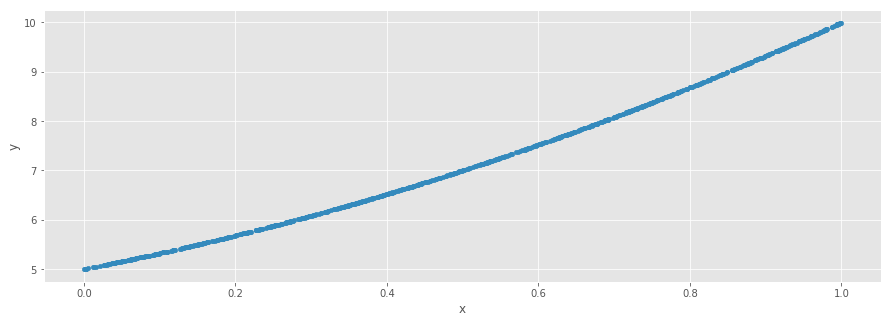

In [6]:
df.plot.scatter(x='x',y='y',figsize=(15,5))

## Model your Graph

Start to use W (for weight) and b (for bias) when setting up your variables. Aside from adding your ReLU activation function, it is a good idea to use Tensorflow's matrix multiplication function (matmul) as shown below.

    The ? in the shape output just means it can be of any shape

For this lesson since we are doing a simple regression, we only have one feature (x). We use the None keyword so that we are not restricted on the number of samples to feed our model.

In [7]:
# you can adjust the number of neurons in the hidden layer here
hidden_size = 1

# placeholders
# shape=[how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32,name="01_x",shape=[None,1])
y = tf.placeholder(tf.float32,name="01_y",shape=[None,1])

print("shape of x and y:")
print(x.get_shape(),y.get_shape())

shape of x and y:
(?, 1) (?, 1)


In [8]:
# create your first hidden layer!
# tf.truncated_normal([how many samples do you have, size of output layer])

W1 = tf.Variable(tf.truncated_normal([1, hidden_size], mean=0.1, stddev=0.1), name="w1")

# tf.truncated_normal([size of output layer])
b1 = tf.Variable(tf.truncated_normal([hidden_size], mean=0.1, stddev=0.1), name="b1")

# shape of h1 = [size of your samples, size of output layer]
h1 = tf.nn.relu(tf.matmul(x, W1) + b1, name="h1")

print("shape of hidden layer:")
print(h1.get_shape())

shape of hidden layer:
(?, 1)


In [9]:
# Output Layer
W = tf.Variable(tf.truncated_normal([hidden_size, 1], mean=0.1, stddev=0.1), name="w")
b = tf.Variable(tf.truncated_normal([1], mean=0.1, stddev=0.1), name="b")

# note that the input comes from our hidden layer h1
pred = tf.nn.relu(tf.matmul(h1, W) + b)

print("shape of output layer:")
print(pred.get_shape())

shape of output layer:
(?, 1)


In [18]:
# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - y))

# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.09)
train = optimizer.minimize(loss)

## How Good is Your model?

In [19]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Training Time!

In [38]:
# initialize the variables
init = tf.global_variables_initializer()

# hold step and error values
t = []

# Run your graph
with tf.Session() as sess:
    
    # initialize variables
    sess.run(init)

    # Fit the function.
    for step in range(200):

        # get your data
        train_data = {x:train_x, y:train_y}
        test_data = {x:test_x, y:test_y}
        
        # training in progress...
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        
        
        # print every n iterations
        if step%50==0:
           
            # capture the step and error for analysis
            t.append((step, train_loss))    
            
            # get snapshot of current training accuracy       
            train_acc = accuracy.eval(train_data)            
                
            print("Training loss at step %d: %f" % (step, train_loss))                              
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Test Set:", accuracy.eval(test_data) )
    
    # capture predictions on test data 
    test_results = sess.run(pred, feed_dict={x:test_x})  
    df_final = pd.DataFrame({'test_x':test_x[:,0],
                             'pred':test_results[:,0]})
    
    # capture training and validation loss
    df_loss = pd.DataFrame(t, columns=['step', 'train_loss'])  

Training loss at step 0: 51.171162
Training loss at step 50: 0.024177
Training loss at step 100: 0.022185
Training loss at step 150: 0.022185
Accuracy on the Training Set: 0.8835294
Accuracy on the Test Set: 0.87333333


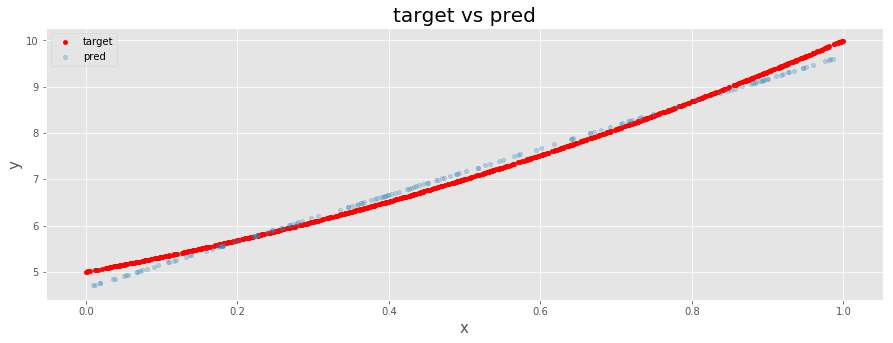

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');

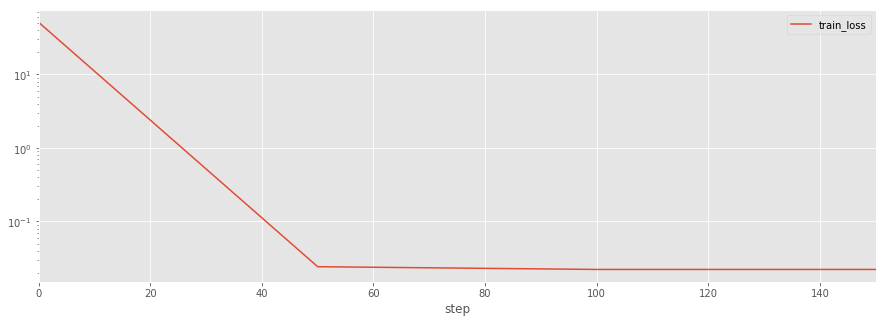

In [40]:
df_loss.set_index('step').plot(logy=True, figsize=(15,5));